<h1> Cast the problem of bi-gram character level language modeling into the neural network framework</h1>



In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
# making the dictionary to save the pair of token of words 
b={}
for w in words[:]:
    ch = ['<S>']+ list(w) + ['<E>']
    for ch1, ch2 in zip(ch, ch[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram , 0)+ 1
#         print(ch1, ch2)
                               

In [4]:
sorted(b.items() , key = lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [5]:
import torch
N = torch.zeros((27,27), dtype = torch.int32)

In [6]:
chars  = sorted(list(set(''.join(words))))
s_to_i = {s:i+1 for i,s in enumerate(chars)}  # here we are starting from 1 --> a
s_to_i['.'] = 0 # here we are gonna rep. the dot with a 0
s_to_i

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [7]:
i_to_s = {i:s for s,i in s_to_i.items()}
i_to_s

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [8]:
# create the training set of bigrams (x,y) --- in this we will be given with the first char of the bigram and we are gonna predict the next one 

xs, ys = [], [] 

for w in words[:1]:
    chs = ['.']+ list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
# torch.tensor(xs) --> have data type of torch.int64
# torch.Tensor(xs) --> have data type of torch.float32
# so it is advised to use small t wala tensor 

. e
e m
m m
m a
a .


In [9]:
# as saw in the neural network this is the vector of input 
xs

tensor([ 0,  5, 13, 13,  1])

In [10]:
# as saw in the neural network this is the vector for output corresponding to the input  
ys

tensor([ 5, 13, 13,  1,  0])

so from the above eg we get <br>

If the input is 0 then the weights gets arranged in such a way that it gives higher probab. to 5<br>

and similarly 
for input 5 it should output 13<br>

and for 13 we should have high probability for 13 and 1 cuz' in above eg we are getting both 13 and 1 as the output

In [11]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
xenc.shape, xenc.dtype

(torch.Size([5, 27]), torch.float32)

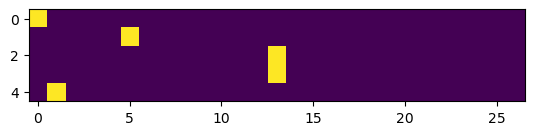

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

plt.imshow(xenc)

In [14]:
# it returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1
W = torch.randn((27, 27)) 
# @ is the matrix multiplication operator in pytorch 
xenc @ W 

tensor([[ 1.5052, -0.2965, -0.8620, -1.0848,  0.4927, -0.7324,  0.1335,  1.0255,
         -1.0439, -0.2324, -0.2651, -0.7542, -0.1217,  2.0696,  1.0946, -0.0664,
          0.6529,  0.2022,  0.1083,  0.0642, -0.7448, -0.0251, -0.0073,  0.5095,
         -0.0356, -0.1453, -0.1036],
        [ 0.3888, -1.5286, -0.2644, -1.1495,  0.0964, -0.8174,  1.1880, -1.3549,
         -0.7675,  0.3875, -0.2765, -0.5245, -1.1222, -0.9119,  1.8181,  1.1642,
          0.8621,  0.2908,  1.1448,  1.0296, -1.6564, -1.0442, -0.1837,  1.7978,
         -0.3542, -0.0039, -1.2891],
        [-1.1284, -0.9209,  0.3753, -0.5262, -0.1537,  1.3032,  2.5871,  1.0420,
          0.1330, -3.0457, -1.1043,  0.1338,  0.2504, -0.3996,  0.5879,  1.9217,
         -0.7039, -0.6808,  1.6887, -0.5187, -1.4659, -0.4119, -0.5317,  0.0742,
          0.5718, -1.6558,  1.2311],
        [-1.1284, -0.9209,  0.3753, -0.5262, -0.1537,  1.3032,  2.5871,  1.0420,
          0.1330, -3.0457, -1.1043,  0.1338,  0.2504, -0.3996,  0.5879,  1.9217

In [17]:
(xenc@ W).shape
# it is giving the firing rate of the 13th neural by looking at the 3rd input 

torch.Size([5, 27])

In [15]:
(xenc@ W)[3,13]

tensor(-0.3996)

In [18]:
# exponentiating the values 
(xenc@ W).exp()

tensor([[ 1.7892,  1.6048,  3.6046,  1.3927,  0.2487,  3.8505,  0.6844,  4.3835,
          9.5797,  0.4024,  1.4976,  3.2428, 10.8602,  2.8200,  1.6085,  1.0755,
          1.2264,  1.6987,  0.9290,  0.6224,  0.2561,  1.3029,  6.3320,  1.6497,
          0.2575,  0.3703,  0.7293],
        [ 0.8901,  0.5410,  0.1205,  3.0293,  0.7597,  2.5663,  0.5378,  0.5805,
          1.7121,  0.3324,  2.3788,  0.6260,  0.6511,  1.3930,  1.5999,  1.0161,
          0.9345,  1.1938,  1.7966,  1.4735, 16.9848,  0.5954,  0.4831,  0.2435,
          6.1300,  0.1050,  7.8355],
        [ 0.5066,  0.1915,  1.1155,  3.8867,  1.1353,  2.6444,  1.8555,  0.3208,
          0.7409,  0.6839,  0.8738,  3.0456,  0.6069,  1.0780,  1.7074,  0.6081,
          3.5605,  1.0333,  0.1739,  0.6315,  0.7395, 15.3230,  7.6156,  0.3073,
          2.2183,  1.4525,  0.3237],
        [ 0.5066,  0.1915,  1.1155,  3.8867,  1.1353,  2.6444,  1.8555,  0.3208,
          0.7409,  0.6839,  0.8738,  3.0456,  0.6069,  1.0780,  1.7074,  0.6081

In [21]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N--> refering to the blue table in the previous notebook
probs = counts/ counts.sum(1, keepdims=True)
probs

tensor([[0.0279, 0.0251, 0.0563, 0.0218, 0.0039, 0.0601, 0.0107, 0.0685, 0.1496,
         0.0063, 0.0234, 0.0507, 0.1696, 0.0440, 0.0251, 0.0168, 0.0192, 0.0265,
         0.0145, 0.0097, 0.0040, 0.0204, 0.0989, 0.0258, 0.0040, 0.0058, 0.0114],
        [0.0158, 0.0096, 0.0021, 0.0536, 0.0134, 0.0454, 0.0095, 0.0103, 0.0303,
         0.0059, 0.0421, 0.0111, 0.0115, 0.0247, 0.0283, 0.0180, 0.0165, 0.0211,
         0.0318, 0.0261, 0.3006, 0.0105, 0.0085, 0.0043, 0.1085, 0.0019, 0.1387],
        [0.0093, 0.0035, 0.0205, 0.0715, 0.0209, 0.0486, 0.0341, 0.0059, 0.0136,
         0.0126, 0.0161, 0.0560, 0.0112, 0.0198, 0.0314, 0.0112, 0.0655, 0.0190,
         0.0032, 0.0116, 0.0136, 0.2818, 0.1400, 0.0057, 0.0408, 0.0267, 0.0060],
        [0.0093, 0.0035, 0.0205, 0.0715, 0.0209, 0.0486, 0.0341, 0.0059, 0.0136,
         0.0126, 0.0161, 0.0560, 0.0112, 0.0198, 0.0314, 0.0112, 0.0655, 0.0190,
         0.0032, 0.0116, 0.0136, 0.2818, 0.1400, 0.0057, 0.0408, 0.0267, 0.0060],
        [0.0097, 0.0218,

In [22]:
probs[0] ,probs[0].sum(), probs[0].shape

(tensor([0.0279, 0.0251, 0.0563, 0.0218, 0.0039, 0.0601, 0.0107, 0.0685, 0.1496,
         0.0063, 0.0234, 0.0507, 0.1696, 0.0440, 0.0251, 0.0168, 0.0192, 0.0265,
         0.0145, 0.0097, 0.0040, 0.0204, 0.0989, 0.0258, 0.0040, 0.0058, 0.0114]),
 tensor(1.),
 torch.Size([27]))

<h1> FINAL CODE FOR BIGRAM USING VECTORIZED FORM</h1>

In [16]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s_to_i[ch1]
    ix2 = s_to_i[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
# randomly initialize 27 neurons weights each neuron recives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [18]:
xs.shape

torch.Size([228146])

In [39]:
# gradient descent
for k in range(10):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
    
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  #the above two lines together are implementing softmax

  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # mean squared error 
    
# The first part computes the negative log-likelihood of 'ys' given the predicted probabilities probs. 
# The second part adds a regularization term that encourages small values in the weight matrix W.
# The overall loss is the sum of these two terms.
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update 
  W.data += -50 * W.grad #in this 50 is the learning rate
# print(loss.item())

3.768618583679199
3.3788068294525146
3.161090850830078
3.0271859169006348
2.9344840049743652
2.867231607437134
2.8166542053222656
2.777146577835083
2.745253801345825
2.7188305854797363


In [41]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # generating the probability row for the next character 
    
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() #this is sampling from that row 
    out.append(i_to_s[ix])
    
    if ix == 0:
      break
    
  print(''.join(out))

juwjde.
janaqydjufhfbywe.
nn.
ksh.
ritoleras.
twt.
kdahnaauyanilevias.
dbdainrwiet.
dsejaielylarte.
karmumahafon.
